<a href="https://colab.research.google.com/github/sanhiitaa/game-recommendation-system/blob/main/game_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# making the root directory to store the api token
! mkdir -p /root/.kaggle

# moving the api token to the root directory
! mv kaggle.json /root/.kaggle

# importing kaggle
import kaggle


In [ ]:
!kaggle datasets download -d antonkozyriev/game-recommendations-on-steam

 99% 609M/618M [00:07<00:00, 62.4MB/s]
100% 618M/618M [00:07<00:00, 88.7MB/s]


In [ ]:
! unzip game-recommendations-on-steam

Archive:  game-recommendations-on-steam.zip
  inflating: games.csv               
  inflating: games_metadata.json     
  inflating: recommendations.csv     
  inflating: users.csv               


# Games dataset

In [ ]:
games=pd.read_csv('games.csv')
games.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


In [ ]:
games.shape

(50796, 13)

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50796 entries, 0 to 50795
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50796 non-null  int64  
 1   title           50796 non-null  object 
 2   date_release    50796 non-null  object 
 3   win             50796 non-null  bool   
 4   mac             50796 non-null  bool   
 5   linux           50796 non-null  bool   
 6   rating          50796 non-null  object 
 7   positive_ratio  50796 non-null  int64  
 8   user_reviews    50796 non-null  int64  
 9   price_final     50796 non-null  float64
 10  price_original  50796 non-null  float64
 11  discount        50796 non-null  float64
 12  steam_deck      50796 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


In [ ]:
games.sample(5)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
48519,1353300,Idle Slayer,2020-12-21,True,False,False,Very Positive,85,4584,0.00,0.00,0.0,True
43405,436520,Line of Sight,2017-01-31,True,False,False,Mixed,59,9094,0.00,0.00,0.0,True
35790,1514100,Adventure War : Battlefield,2021-10-08,True,False,False,Mixed,54,31,0.00,0.00,0.0,True
3718,376966,Train Simulator: Albula Line: St Moritz - Thus...,2016-09-01,True,False,False,Very Positive,92,84,39.99,39.99,0.0,True
6522,370600,Hello Kitty and Sanrio Friends Racing,2015-07-09,True,False,False,Mostly Positive,76,38,19.99,19.99,0.0,True


In [ ]:
games.describe()

,app_id,positive_ratio,user_reviews,price_final,price_original,discount
count,5.079600e+04,50796.000000,5.079600e+04,50796.000000,50796.000000,50796.000000
mean,1.053900e+06,77.051205,1.826493e+03,8.600661,8.739845,5.600579
std,6.094493e+05,18.255492,4.010343e+04,11.496417,11.510670,18.619336
min,1.000000e+01,0.000000,1.000000e+01,0.000000,0.000000,0.000000
25%,5.282450e+05,67.000000,1.900000e+01,0.990000,0.990000,0.000000
50%,9.850750e+05,81.000000,4.800000e+01,4.990000,4.990000,0.000000
75%,1.523155e+06,91.000000,2.060000e+02,10.990000,11.990000,0.000000
max,2.576800e+06,100.000000,7.494460e+06,299.990000,299.990000,90.000000


In [ ]:
gamesmeta=pd.read_json('/content/games_metadata.json', lines=True, orient='records')
gamesmeta

,app_id,description,tags
0,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,,[Action]
2,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."
...,...,...,...
50791,2195250,,[]
50792,2362300,,[]
50793,2296380,,[]
50794,1272080,,[]


In [ ]:
# extracting tags
gamesmeta.tags[3][1]

'Adventure'

In [ ]:
games=games.merge(gamesmeta, on='app_id', how='left')
games.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,description,tags
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True,,[Action]
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."


In [ ]:
# levels of rating given to the games
games.rating.value_counts()

Positive                   13492
Very Positive              13107
Mixed                      12135
Mostly Positive             8727
Mostly Negative             1848
Overwhelmingly Positive     1110
Negative                     303
Very Negative                 60
Overwhelmingly Negative       14
Name: rating, dtype: int64

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50796 non-null  int64  
 1   title           50796 non-null  object 
 2   date_release    50796 non-null  object 
 3   win             50796 non-null  bool   
 4   mac             50796 non-null  bool   
 5   linux           50796 non-null  bool   
 6   rating          50796 non-null  object 
 7   positive_ratio  50796 non-null  int64  
 8   user_reviews    50796 non-null  int64  
 9   price_final     50796 non-null  float64
 10  price_original  50796 non-null  float64
 11  discount        50796 non-null  float64
 12  steam_deck      50796 non-null  bool   
 13  description     50796 non-null  object 
 14  tags            50796 non-null  object 
dtypes: bool(4), float64(3), int64(3), object(5)
memory usage: 4.8+ MB


In [ ]:
# defining a function to replace empty list in tags column with None.
def replaceWnone(arr):
  return arr if len(arr)>0 else None

# applying function
games['tags']=games['tags'].apply(replaceWnone)

# removing rows with null values in the tags
games=games.dropna()

In [ ]:
# extracting individual genre from the array of tags given to the game
genre=games['tags']
l=[]
for i in genre:
  for j in i:
    l.append(j)

In [ ]:
# converting the list of genre into a dataframe and counting values for each genre
genre=pd.value_counts(np.array(l)).reset_index()

# renaming columns for clarity
genre.columns=['genre','value-counts']

# sorting the values in desceding order
genre=genre.sort_values(by='value-counts', ascending=False)

#selecting only top 100 genre
genre=genre[:100]
print(genre.shape)
genre

(100, 2)


,genre,value-counts
0,Indie,27957
1,Singleplayer,22565
2,Action,21895
3,Adventure,20181
4,Casual,17844
...,...,...
95,Interactive Fiction,1521
96,Drama,1520
97,Choose Your Own Adventure,1508
98,Walking Simulator,1498


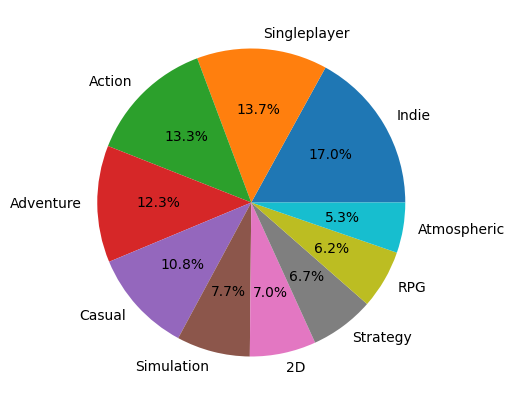

In [ ]:
# setting figure size
plt.figure(figsize=(5,5))

# pie chart representing the distribution of top 10 genre of games
plt.pie(genre['value-counts'][:10],labels=genre['genre'][:10], autopct='%1.1f%%');

17% of the games belong to the tag 'Indie' follwed by 'Singleplayer' games and then 'Action'.
Indie represents individual video games, indicating that 17% of all the games with tags are indie.

In [ ]:
# function to annotate barplots:

# for horizontal barplots
def ann_horizontal(ax):
  for p in ax.patches:
    height=p.get_height()/2
    width=p.get_width()
    ax.annotate(width, (width, p.get_y()+height),
                ha='left', va='center',
                textcoords='data')

# for vertical barplots
def ann_vertical(ax):
  for p in ax.patches:
    height=p.get_height()
    width=p.get_width()/2
    ax.annotate(height, (p.get_x()+ width, height),
                ha='center', va='bottom',
                textcoords='data')

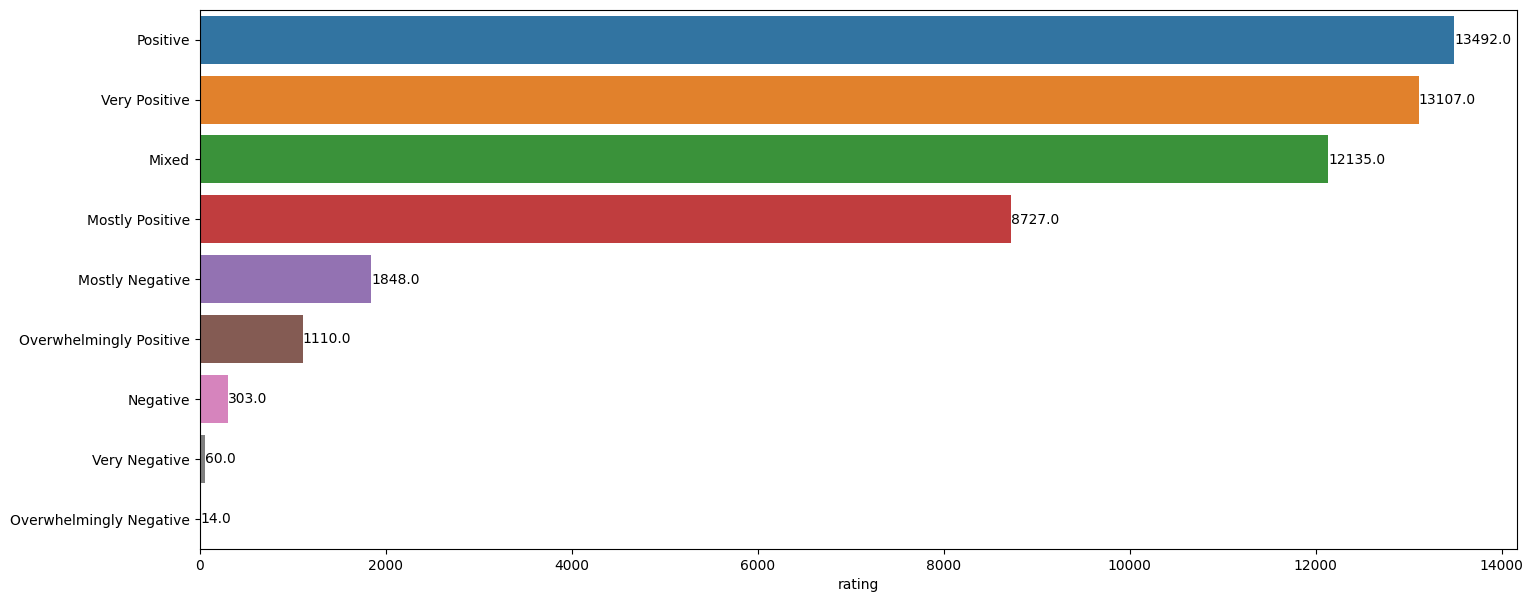

In [ ]:
# rating distribution
plt.figure(figsize=(17,7))
ratings=games.rating.value_counts()
ax=sns.barplot(x=ratings,y=ratings.index)

# adding annotations
ann_horizontal(ax)

Majority of the games were rated either positive, very postive, mixed and mostly positive.

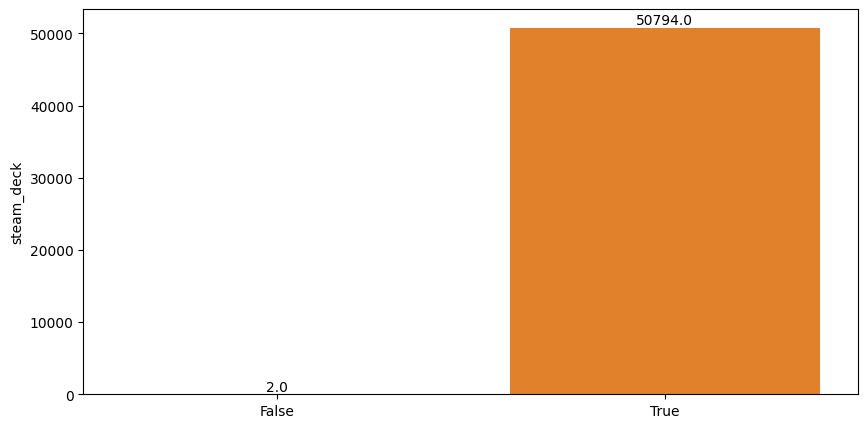

In [ ]:
# setting figure size
plt.figure(figsize=(10,5))

# steam deck distribution
sdd=games.steam_deck.value_counts()
ax=sns.barplot(x=sdd.index, y=sdd)

# adding annotations
ann_vertical(ax)

<Axes: xlabel='date_release', ylabel='Count'>

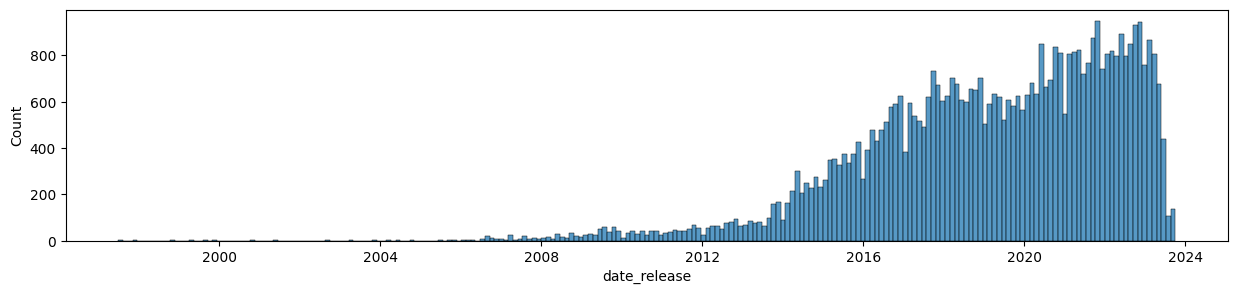

In [ ]:
# converting to date of release to datetime
games['date_release']=pd.to_datetime(games['date_release'])

# setting figure size
plt.figure(figsize=(15,3))

# plotting to explore trend
sns.histplot(games['date_release'], bins=int(len(games) ** 0.5))

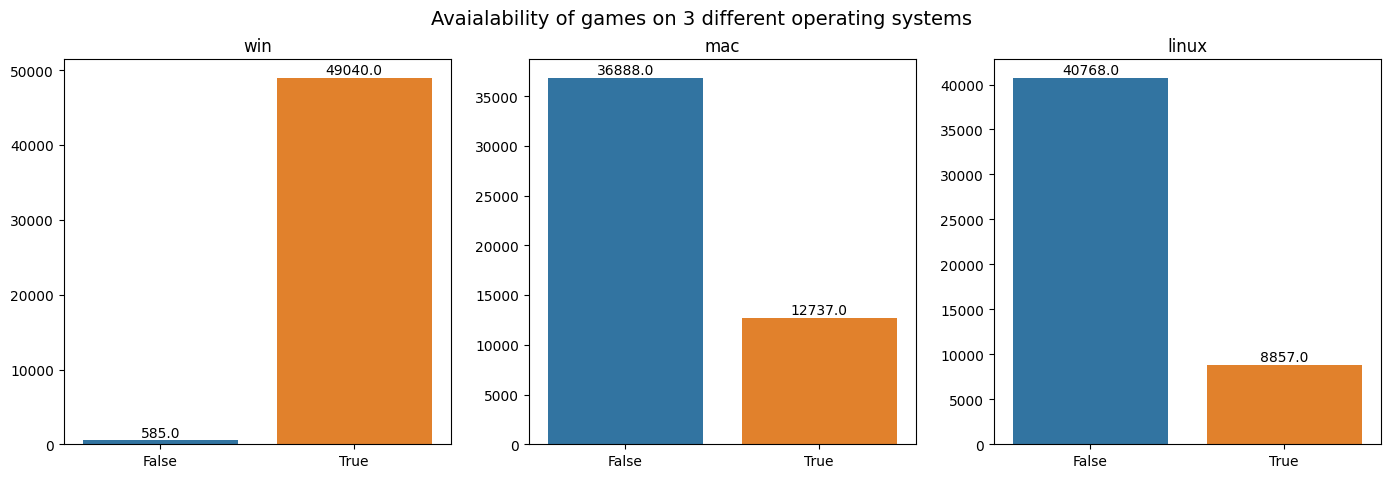

In [ ]:
# distribution of avaialability of games on 3 different operating systems
wind=games['win'].value_counts()
macd=games['mac'].value_counts()
linuxd=games['linux'].value_counts()

# adding the above data into a list of easy accessibility in for loop
data=[wind, macd, linuxd]

# setting up subplots
fig, ax=plt.subplots(1,3, figsize=(17, 5))

for i in range(3):
  sns.barplot(x=data[i].index, y=data[i].values, ax=ax[i])
  ax[i].set_title(data[i].name)
  ann_vertical(ax[i])

plt.suptitle('Avaialability of games on 3 different operating systems', fontsize=14);

In [ ]:
games.sample(10)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,description,tags
27209,1457150,Leafling,2020-12-15,True,False,False,Mostly Positive,71,617,0.00,0.00,0.0,True,Leafling Online is a free to play 2D Action MO...,"[MMORPG, JRPG, Dungeon Crawler, Hack and Slash..."
31192,764240,Horse Paradise - My Dream Ranch,2017-12-15,True,False,False,Mixed,68,29,3.49,9.99,65.0,True,Play and race as your dream wild horse in an e...,"[Adventure, Massively Multiplayer, Casual, Sim..."
16822,1933770,Animal Avatar Maker for VRChat Vroid VRM and C...,2022-04-16,True,True,False,Very Positive,91,95,0.00,0.00,0.0,True,Zoo Studio justs help you to make your own ani...,"[Animation & Modeling, VR, Character Customiza..."
41960,448480,Caravanserail,2016-03-10,True,True,True,Mixed,68,16,2.99,2.99,0.0,True,Caravanserail is an arcade-ish trading game. B...,"[Indie, Simulation, Trading]"
47506,285190,Warhammer 40000: Dawn of War III,2017-04-27,True,True,True,Mixed,49,12022,39.99,39.99,0.0,True,Step into a brutal battle between three warrin...,"[Warhammer 40K, Strategy, RTS, Sci-fi, Multipl..."
26682,2092700,江湖群雄传,2022-08-04,True,False,False,Mostly Negative,27,11,9.99,9.99,0.0,True,The legend of heroes in the Jianghu is a marti...,"[RPG, Martial Arts, Turn-Based Tactics, Single..."
28650,630160,Super Rocket Shootout,2017-07-14,True,True,True,Mostly Positive,76,17,9.99,9.99,0.0,True,Super Rocket Shootout is a frantic 2D pixelart...,"[Action, Indie, 4 Player Local, Local Multipla..."
46647,485680,sphereFACE,2017-05-19,True,True,True,Positive,95,22,9.99,9.99,0.0,True,sphereFACE is a retro-styled 3D vector shooter...,"[Action Roguelike, Casual, Action, Indie, Rogu..."
31515,373730,Way of Gold and Steel,2015-08-17,True,False,False,Mixed,54,71,1.97,8.99,78.0,True,"What is in the ""Way of Gold and Steel"" which m...","[Strategy, Indie, Roguelike, RTS, Pixel Graphics]"
5876,737050,Open Sorcery: Sea++,2021-01-25,True,True,True,Positive,95,40,14.99,14.99,0.0,True,"You wake up at the bottom of the ocean, surrou...","[RPG, Indie, Adventure, Text-Based, Female Pro..."


<Axes: xlabel='positive_ratio', ylabel='Count'>

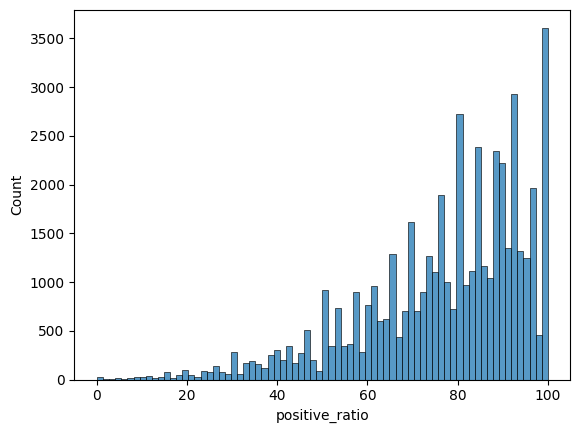

In [ ]:
sns.histplot(games['positive_ratio'])

In [ ]:
recommendations=pd.read_csv('recommendations.csv')
recommendations.head()

In [ ]:
users=pd.read_csv('users.csv')
users.head()

In [ ]:
# staging changes
!git add .

# commiting changes
!git commit -m "setting up git commands"

# pushing file
!git push origin main